In [17]:
#Hana's 495 Final Project

#CHECK POINT 1 = DEEP NERUAL NETWORK OF CLASSIFICATION FOR KANJI FOR BASELINE PERFORMANCE

Import everything important

In [18]:
#import important things
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras import metrics


# import pandas as pd
# import matplotlib.pyplot as plt

Import data set

In [19]:
#from the downloaded data on my computer---load it into a variable
#'training' is the pictures
#'label'    is the description of the pictures
training_binary = np.load("C:/Users/C25Hana.Hill/495/495/Final_Project_495/k49-train-imgs.npz")
label_binary = np.load("C:/Users/C25Hana.Hill/495/495/Final_Project_495/k49-train-labels.npz")

# print(training_binary.files, label_binary.files)
print(training_binary.files)
print(label_binary.files)

training_binary['arr_0']

# inside_array_training = training_binary['arr_0']
# print(inside_array_training)

# inside_array_label = label_binary['arr_0']
# print(inside_array_label)


#----------------------------TESTING-------------------------------------------------
#JUST PRINTING FOR TRIANINGY BINARY

# Load the .npz file
#TRAINGING_BINRAY ---------------     loaded_data = np.load('data.npz')

# Get the list of keys (names of the arrays) in the .npz file
# array_names = training_binary.files

# # Print the names of the arrays
# print("Arrays in the .npz file:", array_names)

# # Access and print the arrays one by one
# for array_name in array_names:
#     array = training_binary[array_name]
#     print(f"Array '{array_name}':")
#     print(array)

#-------------------------

# array_names = label_binary.files

# # Print the names of the arrays
# print("Arrays in the .npz file:", array_names)

# # Access and print the arrays one by one
# for array_name in array_names:
#     array = label_binary[array_name]
#     print(f"Array '{array_name}':")
#     print(array)





['arr_0']
['arr_0']


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 4, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 2, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Check to make sure your data was downloaded by printint an example.

In [20]:
#the arr_0 is the key to access the first array
x_train = training_binary["arr_0"]
y_train = label_binary["arr_0"]

#shape gives us dimentions or how much is in the arrays
print("x_shape:", x_train.shape)
print("y_shape:", y_train.shape)

#class gives us number of unique possible outputs
num_class = len(np.unique(y_train))
print("Classes:", num_class)


img_dim = x_train.shape[1]
print("image dimensions:", img_dim)


#prints the first 10 elements of y_train, insight of labels.
print(y_train[0:10])


x_shape: (232365, 28, 28)
y_shape: (232365,)
Classes: 49
image dimensions: 28
[30 19 20 30  7  4 35 20 24 43]


Now that we have our data, lets get a visual so we can confirm it works. 

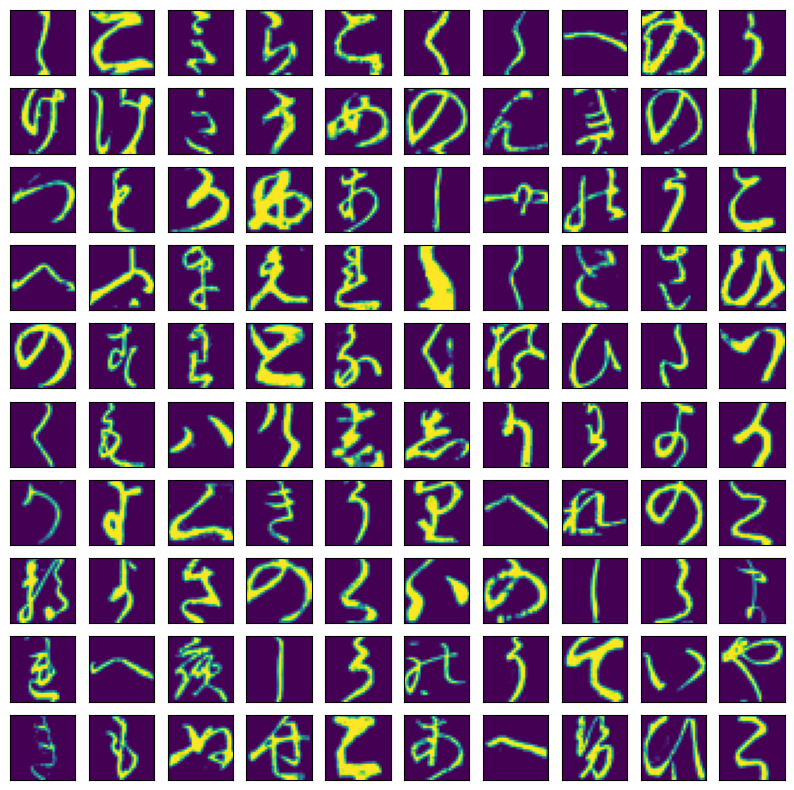

In [21]:
def showRandom100Examples(X, y, imgdim=28):
    # Generate 100 random indices
    random_idx = np.random.randint(0, X.shape[0], 100)
    random_set = X[random_idx]
    random_set = random_set.reshape(10, 10, imgdim, imgdim)
    # Create 10x10 grid
    fig, ax = plt.subplots(10, 10, figsize=(10, 10))
    for i in range(random_set.shape[0]):
        for j in range(random_set.shape[1]):
            example = random_set[i, j]
            ax[i, j].imshow(example)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    plt.show()
            
showRandom100Examples(x_train, 0)

Now lets flatten our data so it's ready for the model


In [23]:
x_train = x_train.reshape(-1, 28*28)
print("Training set shape:", x_train.shape)

scaler = StandardScaler()
scaler.fit(x_train)
Xtrain = scaler.transform(x_train)

ecd = OneHotEncoder()
ecd.fit(y_train.reshape(-1, 1))
ytrain = ecd.transform(y_train.reshape(-1, 1)).toarray()
print(y_train[0:10])

Training set shape: (232365, 784)
[30 19 20 30  7  4 35 20 24 43]


Next we train our model!

In [25]:
def buildModel(dropout_rate=0.0, num_hidden=3, hidden_size=512):
    model = Sequential()
    model.add(InputLayer(input_shape=(img_dim**2,)))

    for i in range(num_hidden):
        model.add(Dense(hidden_size, activation='relu'))
        model.add(Dropout(dropout_rate, input_shape=(hidden_size,)))

    model.add(Dense(num_class, activation='softmax'))
    model.compile(loss=categorical_crossentropy, 
                  optimizer=Adam(1e-4),
                  metrics=['accuracy'])
    return model


model = buildModel(dropout_rate=0.3, num_hidden=4, hidden_size=512)
earlystop = EarlyStopping(
    monitor="val_loss",
    min_delta=1e-3,
    mode="min",
    patience=2,
)

model.fit(Xtrain, ytrain, epochs=5, callbacks=[earlystop], validation_split=0.2) #this was 200 epochs whaaaaaaat

print("Training completed")

Epoch 1/5
5810/5810 [==============================] - 186s 32ms/step - loss: 1.6638 - accuracy: 0.5624 - val_loss: 0.8107 - val_accuracy: 0.7835
Epoch 2/5
5810/5810 [==============================] - 177s 30ms/step - loss: 0.9686 - accuracy: 0.7377 - val_loss: 0.6047 - val_accuracy: 0.8358
Epoch 3/5
5810/5810 [==============================] - 167s 29ms/step - loss: 0.7821 - accuracy: 0.7838 - val_loss: 0.5122 - val_accuracy: 0.8576
Epoch 4/5
5810/5810 [==============================] - 172s 30ms/step - loss: 0.6877 - accuracy: 0.8085 - val_loss: 0.4507 - val_accuracy: 0.8748
Epoch 5/5
5810/5810 [==============================] - 162s 28ms/step - loss: 0.6169 - accuracy: 0.8283 - val_loss: 0.4129 - val_accuracy: 0.8851
Training completed


In [26]:
test_data_bin = np.load("C:/Users/C25Hana.Hill/495/495/Final_Project_495/k49-test-imgs.npz")
test_labels_bin = np.load("C:/Users/C25Hana.Hill/495/495/Final_Project_495/k49-test-labels.npz")

Xtest = test_data_bin["arr_0"]
ytest = test_labels_bin["arr_0"]
print("Xshape:", Xtest.shape)
print("yshape:", ytest.shape)

Xtest = Xtest.reshape(-1, 28*28)
Xtest = scaler.transform(Xtest)
ytest = ecd.transform(ytest.reshape(-1, 1)).toarray()
print("Xshape (flatten):", Xtest.shape)
print("yshape (flatten):", ytest.shape)

Xshape: (38547, 28, 28)
yshape: (38547,)
Xshape (flatten): (38547, 784)
yshape (flatten): (38547, 49)


In [27]:
model.evaluate(Xtest, ytest)


1205/1205 [==============================] - 13s 11ms/step - loss: 0.6942 - accuracy: 0.8093


[0.6942353248596191, 0.8093236684799194]

In [28]:
# Generate hiragana map
prefix = ('', 'k', 's', 't', 'n', 'h', 'm')
suffix = ('a', 'i', 'u', 'e', 'o')
hiramap = np.array([[p+s for s in suffix] for p in prefix])
hiramap = np.append(hiramap, ['ya', 'yu', 'yo', 'ra', 'ri', 'ru', 're', 'ro', 'wa', 'wi', 'we', 'wo', 'n', 'grave'])
hiramap = np.array(hiramap).ravel()

4/4 [==============================] - 0s 9ms/step


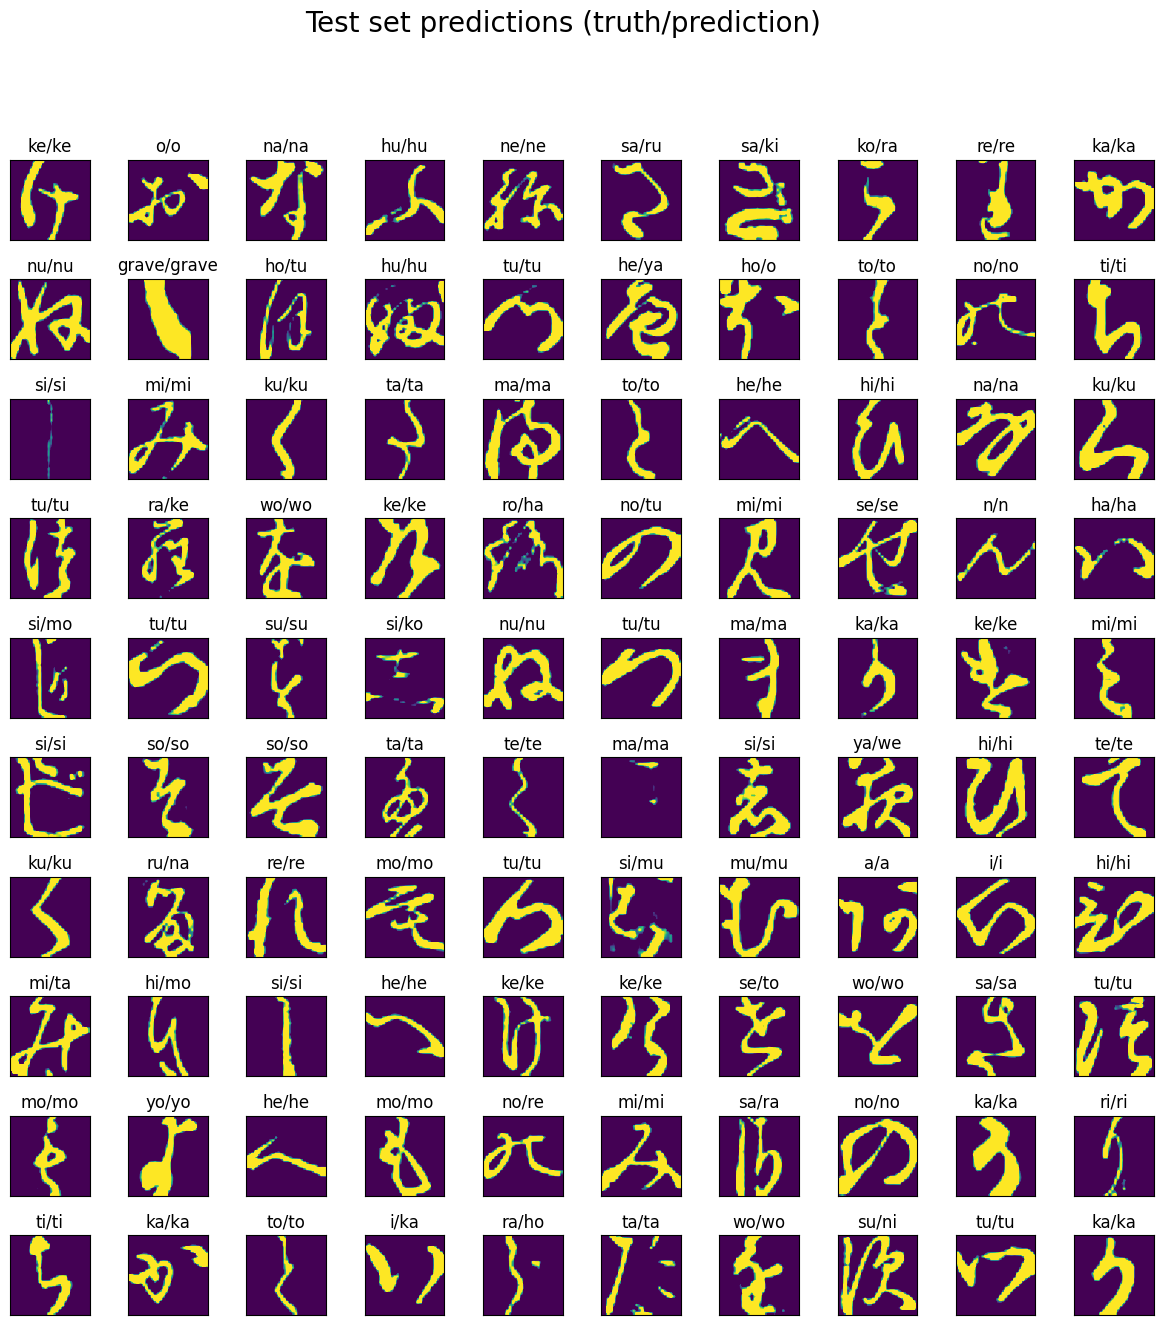

In [29]:
# Generate 100 random indices
imgdim = 28
random_idx = np.random.randint(0, Xtest.shape[0], 100)

random_set = Xtest[random_idx]
random_labels = ecd.inverse_transform(ytest[random_idx]).reshape(10, 10)
pred_labels = model.predict(random_set).argmax(axis=1).reshape(10, 10)

random_set = random_set.reshape(10, 10, imgdim, imgdim)

# Create 10x10 grid
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
fig.suptitle('Test set predictions (truth/prediction)', fontsize=20)

for i in range(random_set.shape[0]):
    for j in range(random_set.shape[1]):
        example = random_set[i, j]
        ax[i, j].imshow(example, vmin=0, vmax=1)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_title(f"{hiramap[random_labels[i, j]]}/{hiramap[pred_labels[i, j]]}")

plt.subplots_adjust(hspace=0.5)
plt.show()